# Project Using K-Means on Pantheon Dataset - PART ONE

Question: Do certain geographies tend to favor well known occupations throughout history? 

For this project we are going to use the latitude and longitude coordinates for clustering.  The final mapping is shown in a sperate jupyter notebook using R.  The notebook is titled PART TWO.  



Clustering Method: Kmeans 

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../../../datasets/mini_project/pantheon-project/database.csv")
df.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.584


In [3]:
sub = df[['latitude','longitude', 'occupation', 'country', 'continent', 'industry']]
sub = sub.dropna()
sub.head()

,latitude,longitude,occupation,country,continent,industry
0,40.33333,23.50000,Philosopher,Greece,Europe,Philosophy
1,37.96667,23.71667,Philosopher,Greece,Europe,Philosophy
2,32.50000,34.90000,Religious Figure,Israel,Asia,Religion
3,37.96667,23.71667,Philosopher,Greece,Europe,Philosophy
4,40.80000,22.51667,Military Personnel,Greece,Europe,Military


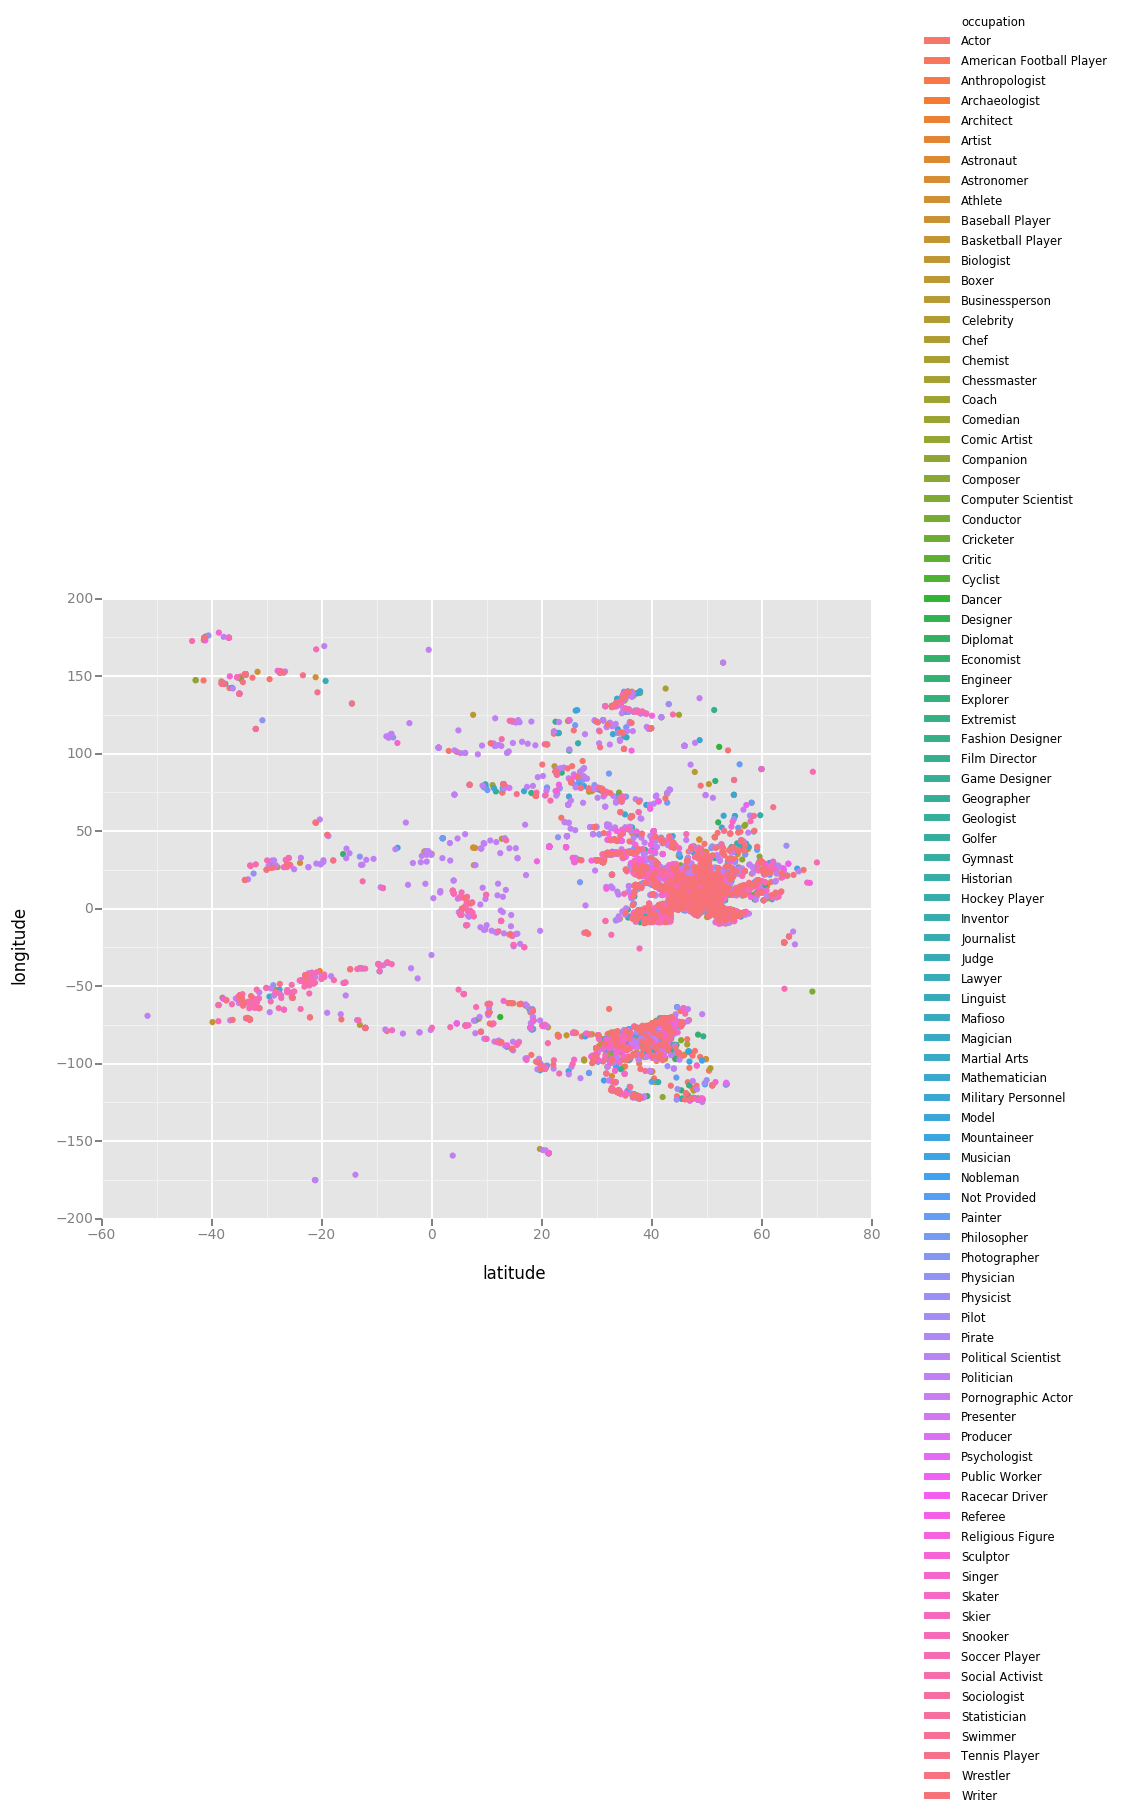

<ggplot: (8729786022422)>

In [4]:
# look at the lat lon coordinates ploted by the two occupations.  There's not quite a pure split here. 
# Some countries close to one another - especially in europe - could generate more inventors or extremists.  
# We'll want to look at country in more detail and this will require transforming country classes into numbers.  

from ggplot import *
p = ggplot(sub, aes(x='latitude', y='longitude', color='occupation')) + geom_point()
p

In [5]:
test = sub
test = test[['latitude','longitude',]]
test.head()

,latitude,longitude
0,40.33333,23.50000
1,37.96667,23.71667
2,32.50000,34.90000
3,37.96667,23.71667
4,40.80000,22.51667


In [6]:
pan_df = np.array(test)
pan_df[:5]

array([[ 40.33333,  23.5    ],
       [ 37.96667,  23.71667],
       [ 32.5    ,  34.9    ],
       [ 37.96667,  23.71667],
       [ 40.8    ,  22.51667]])

I adjusted the clusters until I felt there was a clear seperation between the data.  Eight clusters looked about right, but in the end we could possibly eliminate one or more clusters as potential outliers.  For now we'll set k to 8. 

In [7]:
from sklearn.cluster import KMeans

k=8
kmeans = cluster.KMeans(n_clusters=k)
clusters = kmeans.fit(pan_df)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [8]:
labels

array([7, 7, 7, ..., 7, 2, 0], dtype=int32)

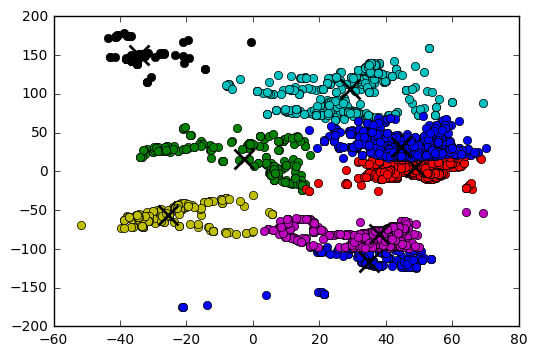

In [9]:
for i in range(k): # repeat loop n times for n clusters
    ds = pan_df[np.where(labels==i)] # Get the data for indexes where label is equal to a particular cluster
    pyplot.plot(ds[:,0],ds[:,1],'o')  
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()


In [10]:
#store the clusters back in one of your dataframes with occupations and country 
sub['cluster'] = pd.Series(labels, index=sub.index)

In [11]:
# let's look at the data in more detail once it is grouped back together 
sub

,latitude,longitude,occupation,country,continent,industry,cluster
0,40.33333,23.50000,Philosopher,Greece,Europe,Philosophy,7
1,37.96667,23.71667,Philosopher,Greece,Europe,Philosophy,7
2,32.50000,34.90000,Religious Figure,Israel,Asia,Religion,7
3,37.96667,23.71667,Philosopher,Greece,Europe,Philosophy,7
4,40.80000,22.51667,Military Personnel,Greece,Europe,Military,7
5,43.78333,10.91667,Inventor,Italy,Europe,Invention,2
7,41.90000,12.50000,Politician,Italy,Europe,Government,2
8,38.41861,27.13917,Writer,Turkey,Europe,Language,7
9,37.75000,26.83333,Philosopher,Greece,Europe,Philosophy,7
10,37.08333,15.28333,Mathematician,Italy,Europe,Math,2


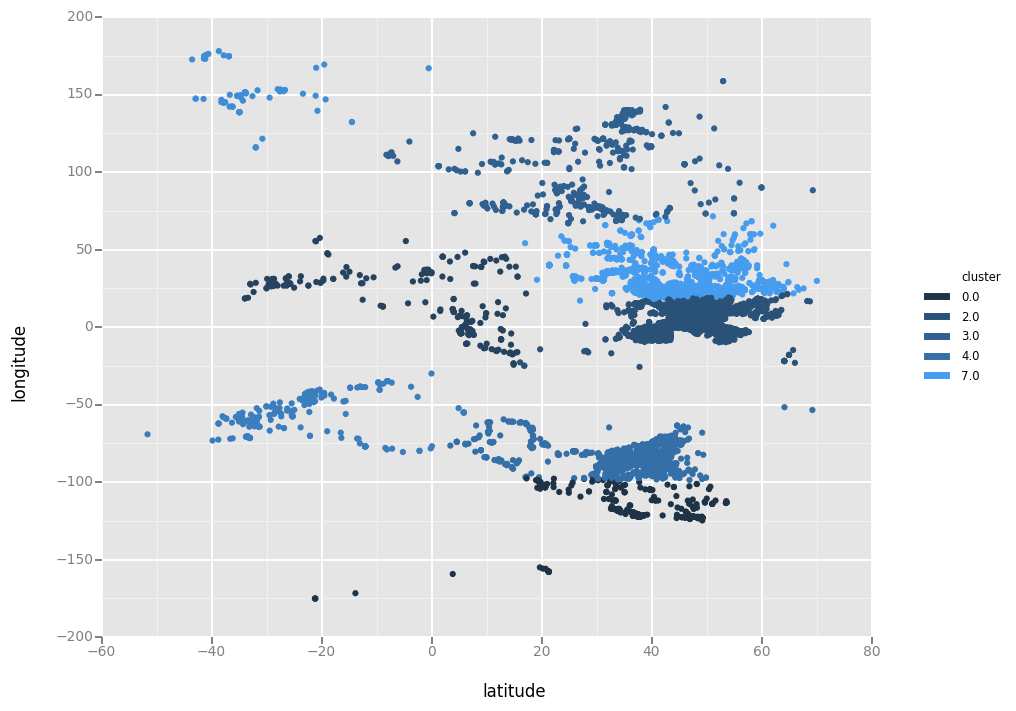

<ggplot: (8729782774869)>

In [12]:
# do we see any other patterns now when plotting? 
from ggplot import *
p1 = ggplot(sub, aes(x='latitude', y='longitude',  color='cluster')) + geom_point()
p1

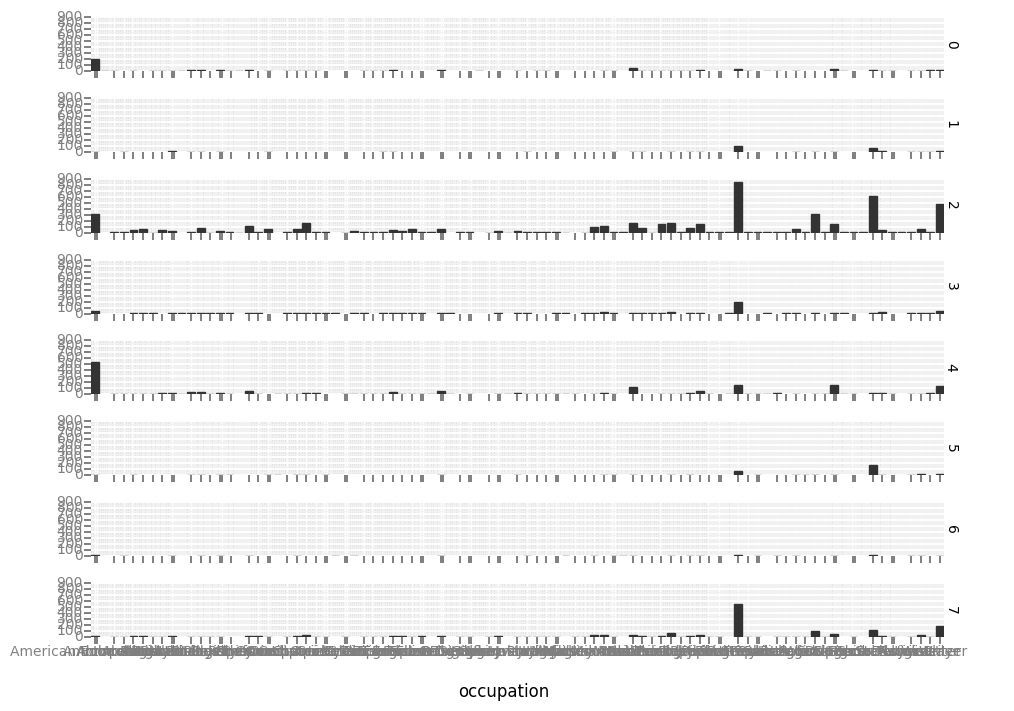

<ggplot: (-9223363307071970830)>

In [13]:
# Let's visualize occupations by cluster.  It is hard to see major patterns here, but we can see some differences. 
from ggplot import *
z = ggplot(aes(x='occupation'), data=sub) 
z = z + geom_bar() + facet_grid('cluster')
z 

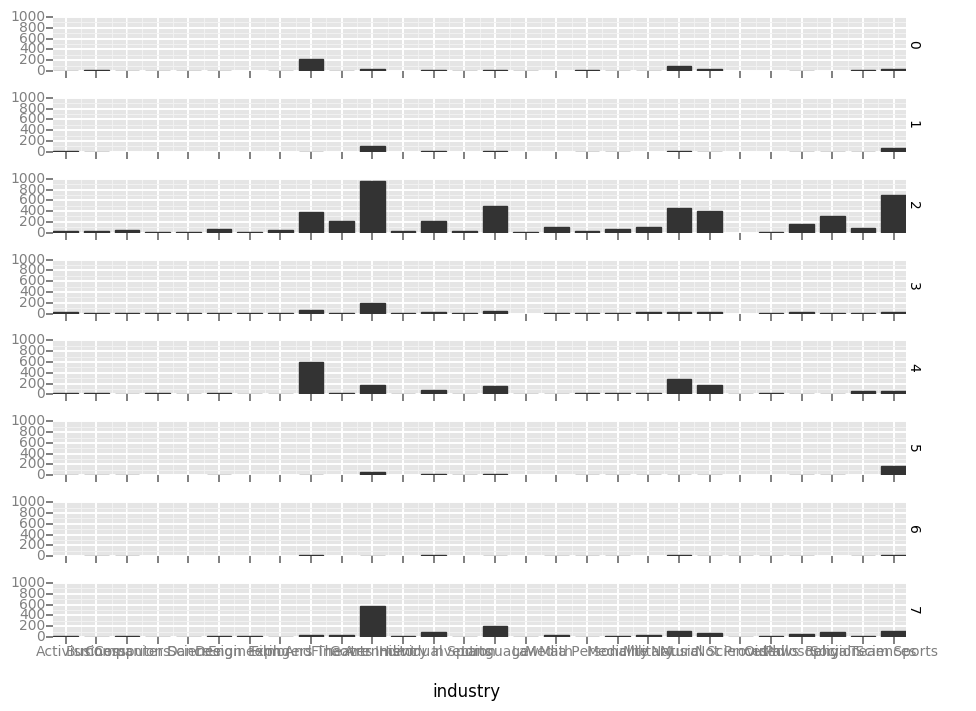

<ggplot: (8729782283612)>

In [14]:
# here we'll visualize industries by cluster.  Some differences are noticable, but cluster 1 seems to be dominant in many industries
from ggplot import *
z = ggplot(aes(x='industry'), data=sub) 
z = z + geom_bar() + facet_grid('cluster')
z 

Save your data in Jupyterhub.  We'd like analyze what is happening with the clusters on maps.  

See this notebook for further analysis: https://jupyterhub.dsa.missouri.edu/user/jamgtn/notebooks/sp17DMIR_jamgtn/modules/module3/Practices/Module%204%20mapping%20mini%20project.ipynb


In [ ]:
sub.to_csv('new_pan_data.csv', sep=',')



Let's do the DBSCAN to see what we find.  Use Latitude and Longitude from the previous pan_df array. 

In [15]:
pan_df

array([[  40.33333,   23.5    ],
       [  37.96667,   23.71667],
       [  32.5    ,   34.9    ],
       ..., 
       [  54.9    ,   23.88611],
       [  48.14389,   17.10972],
       [  34.15611, -118.13194]])

In [16]:
db = DBSCAN(eps = .3, min_samples = 10).fit(pan_df)
db

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [18]:
print(db.labels_[1:20])


[ 0 12  0 -1  1  2 -1 -1 -1  3 -1 -1  4  5  2 -1 -1 -1  6]


In [19]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[1:10]

array([False, False, False, False, False, False, False, False, False], dtype=bool)

In [20]:
db.core_sample_indices_[1:20]

array([ 3,  5,  6, 10, 13, 14, 15, 19, 21, 22, 24, 26, 33, 34, 36, 37, 42,
       50, 51])

In [21]:
# Your answer for activity 3 goes here...

core_samples_mask[db.core_sample_indices_] = True
core_samples_mask[1:10]

array([ True, False,  True, False,  True,  True, False, False, False], dtype=bool)

In [22]:
labels = db.labels_
labels

array([-1,  0, 12, ..., -1, -1, 28])

In [23]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [24]:
n_clusters_

140

In [27]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(pan_df, labels))

Silhouette Coefficient: -0.012


The silhouette coefficient seems to tell us that there may be too many or too few clusters for the data. 

In [28]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

In [29]:
indexes= zip(unique_labels, colors)
list(indexes)

[(0, array([ 0.61960787,  0.00392157,  0.25882354,  1.        ])),
 (1, array([ 0.62806615,  0.01330258,  0.26082277,  1.        ])),
 (2, array([ 0.64498272,  0.03206459,  0.26482124,  1.        ])),
 (3, array([ 0.66189929,  0.05082661,  0.2688197 ,  1.        ])),
 (4, array([ 0.67881586,  0.06958862,  0.27281816,  1.        ])),
 (5, array([ 0.69573243,  0.08835063,  0.27681662,  1.        ])),
 (6, array([ 0.70419071,  0.09773164,  0.27881585,  1.        ])),
 (7, array([ 0.72110728,  0.11649366,  0.28281432,  1.        ])),
 (8, array([ 0.73802385,  0.13525567,  0.28681278,  1.        ])),
 (9, array([ 0.75494042,  0.15401769,  0.29081124,  1.        ])),
 (10, array([ 0.77185699,  0.1727797 ,  0.2948097 ,  1.        ])),
 (11, array([ 0.78877356,  0.19154172,  0.29880816,  1.        ])),
 (12, array([ 0.79723185,  0.20092272,  0.30080739,  1.        ])),
 (13, array([ 0.81414842,  0.21968474,  0.30480586,  1.        ])),
 (14, array([ 0.83106499,  0.23844675,  0.30880432,  1.   

/usr/lib64/python3.4/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


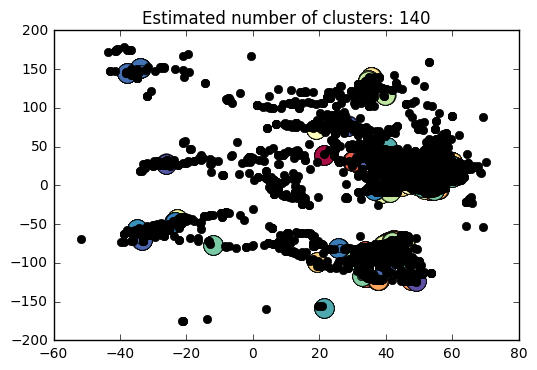

In [30]:
import matplotlib.pyplot as plt

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    match = pan_df[class_member_mask & core_samples_mask]
    plt.plot(match[:, 0], match[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)

    nomatch = pan_df[class_member_mask & ~core_samples_mask]
    plt.plot(nomatch[:, 0], nomatch[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Looking at the results of the DB scan it appears there are a lot of clusters - 140 to be exact.  It appears that 140 clusters is too many.  Perhaps it might be appropriate if we were looking at a slightly different scenario, but for the purposes of this exercise we just want to see broad differences between geographies and the occupations of cultural icons throughout history. There are probably some clusters that represent major differences in occupations, but for purposes of simple communication we'll want to show different occupations broadly in terms of continents or major regions in the world.  Showing the DB scan results will be confusing to many auidences.  

After the above analysis, I don't think a density based cluster analysis is the best fit model.  Let's use the more simple k-mean approach where we have a little more manual control over setting the clusters.  

### The below cells include an initial analysis of the k-means clusters, including a detailed look at cluster 1.  More geospatial analysis can be found in the R notebook.  

In [170]:
sub.describe()

,latitude,longitude,cluster
count,10251.000000,10251.000000,10251.000000
mean,39.998108,-7.246828,1.382304
std,18.648055,55.082143,1.911167
min,-51.633330,-175.200560,0.000000
25%,37.960695,-56.181940,0.000000
50%,43.773700,4.383330,0.000000
75%,50.983330,17.043610,3.000000
max,70.073330,178.017780,7.000000


In [171]:
cluster1 = sub[sub['cluster'] == 0]
cluster2 = sub[sub['cluster'] == 1]
cluster3 = sub[sub['cluster'] == 2]
cluster4 = sub[sub['cluster'] == 3]
cluster5 = sub[sub['cluster'] == 4]
cluster6 = sub[sub['cluster'] == 5]
cluster7 = sub[sub['cluster'] == 6]
cluster8 = sub[sub['cluster'] == 7]

cluster1

,latitude,longitude,occupation,country,continent,industry,cluster
5,43.78333,10.91667,Inventor,Italy,Europe,Invention,0
7,41.90000,12.50000,Politician,Italy,Europe,Government,0
10,37.08333,15.28333,Mathematician,Italy,Europe,Math,0
14,48.25833,13.03500,Politician,Austria,Europe,Government,0
15,47.80000,13.03333,Composer,Austria,Europe,Music,0
17,52.19000,-1.71000,Writer,United Kingdom,Europe,Language,0
18,43.63333,11.98333,Painter,Italy,Europe,Fine Arts,0
19,41.90000,12.50000,Politician,Italy,Europe,Government,0
20,41.92670,8.73690,Politician,France,Europe,Government,0
21,52.80986,-0.62877,Physicist,United Kingdom,Europe,Natural Sciences,0


In [173]:
cluster5

,latitude,longitude,occupation,country,continent,industry,cluster
508,-41.38333,173.11667,Chemist,New Zealand,Oceania,Natural Sciences,4
2794,-36.84056,174.74000,Mountaineer,New Zealand,Oceania,Individual Sports,4
3329,-34.92900,138.60100,Physicist,Australia,Oceania,Natural Sciences,4
4014,-34.92900,138.60100,Psychologist,Australia,Oceania,Social Sciences,4
5036,-33.96811,151.10408,Racecar Driver,Australia,Oceania,Individual Sports,4
5044,-37.81361,144.96306,Physician,Australia,Oceania,Medicine,4
5048,-34.75472,149.61861,Actor,Australia,Oceania,Film And Theatre,4
5478,-37.81361,144.96306,Philosopher,Australia,Oceania,Philosophy,4
5672,-40.55000,176.18333,Physicist,New Zealand,Oceania,Natural Sciences,4
5868,-27.56667,151.95000,Actor,Australia,Oceania,Film And Theatre,4


In [175]:
dum_var1 = pd.get_dummies(cluster1['occupation'])
dum_var1

,Actor,Anthropologist,Archaeologist,Architect,Artist,Astronaut,Astronomer,Athlete,Basketball Player,Biologist,...,Skier,Snooker,Soccer Player,Social Activist,Sociologist,Statistician,Swimmer,Tennis Player,Wrestler,Writer
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


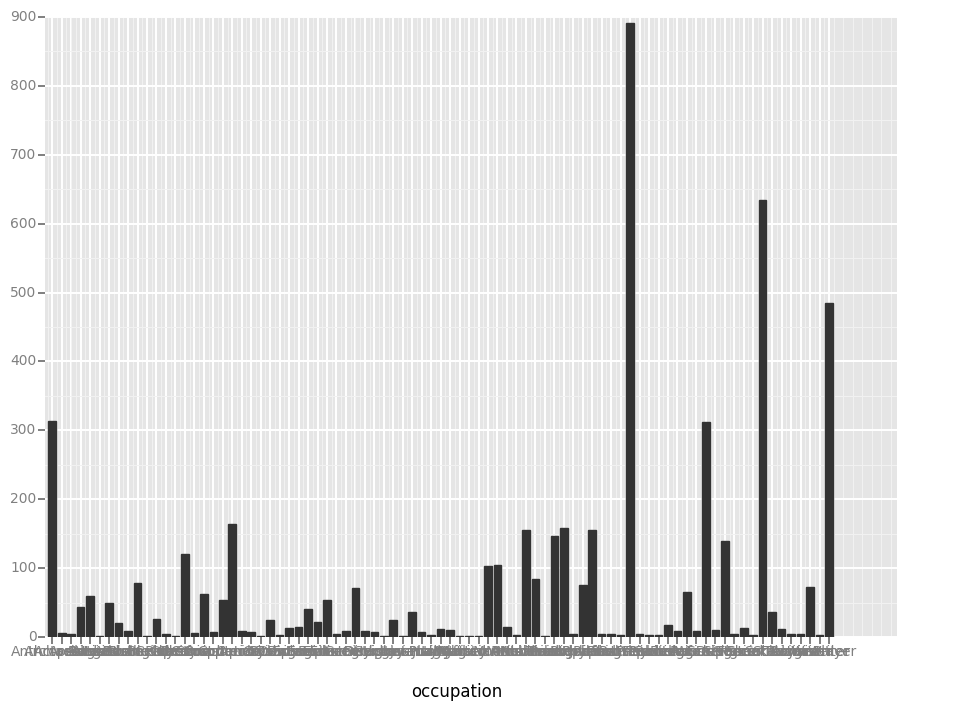

<ggplot: (8766925704782)>

In [176]:
from ggplot import *
z = ggplot(aes(x='occupation'), data=cluster1) 
z = z + geom_bar()
z 

In [180]:
cluster1_sum = dum_var1.sum()
cluster1_sum = pd.DataFrame(cluster1_sum)
cluster1_sum

,0
Actor,314
Anthropologist,6
Archaeologist,5
Architect,43
Artist,60
Astronaut,2
Astronomer,50
Athlete,20
Basketball Player,8
Biologist,78


In [181]:
cluster1_sum.columns = ['cluster1']
cluster1_sum

,cluster1
Actor,314
Anthropologist,6
Archaeologist,5
Architect,43
Artist,60
Astronaut,2
Astronomer,50
Athlete,20
Basketball Player,8
Biologist,78


In [182]:
cluster1_sum.describe()

,cluster1
count,83.000000
mean,62.349398
std,137.202844
min,1.000000
25%,4.000000
50%,10.000000
75%,61.000000
max,891.000000


In [114]:
trial = c1_sub

In [183]:
cluster1_sum.index.name = 'country'
cluster1_sum.reset_index(inplace=True)
cluster1_sum

,country,cluster1
0,Actor,314
1,Anthropologist,6
2,Archaeologist,5
3,Architect,43
4,Artist,60
5,Astronaut,2
6,Astronomer,50
7,Athlete,20
8,Basketball Player,8
9,Biologist,78


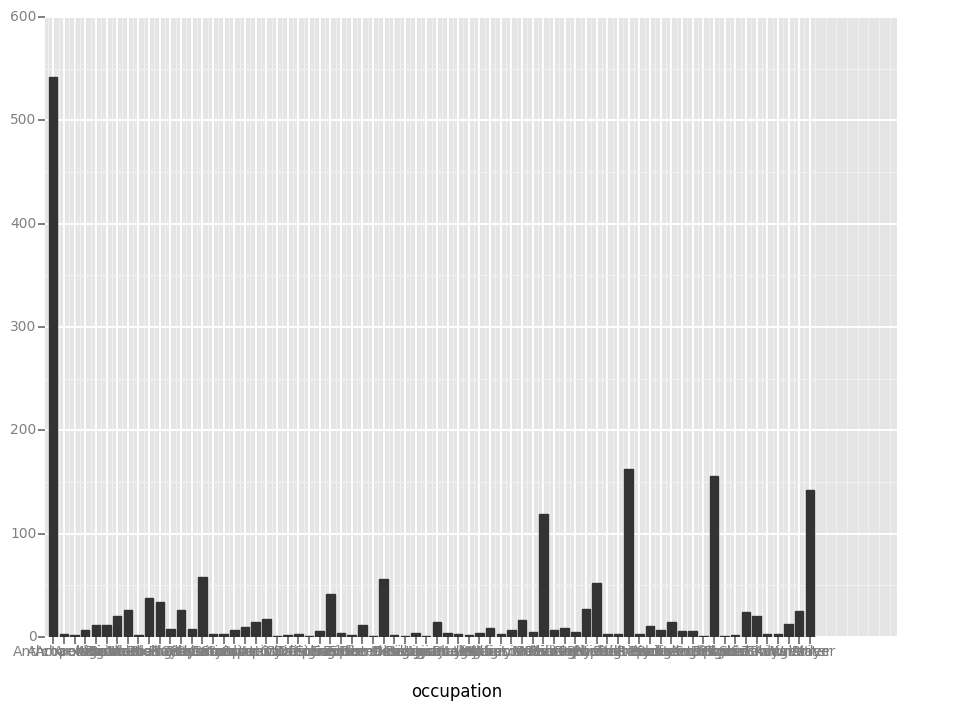

<ggplot: (8766919817743)>

In [184]:
from ggplot import *
z1 = ggplot(aes(x='occupation'), data=cluster2) 
z1 = z1 + geom_bar()
z1 

In [124]:
dum_var2 = pd.get_dummies(cluster2['occupation'])
dum_var2

,Actor,Anthropologist,Archaeologist,Architect,Artist,Astronaut,Astronomer,Athlete,Baseball Player,Basketball Player,...,Singer,Skater,Skier,Soccer Player,Social Activist,Sociologist,Swimmer,Tennis Player,Wrestler,Writer
111,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
116,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
170,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
cluster2_sum = dum_var2.sum()
cluster2_sum = pd.DataFrame(cluster2_sum)
cluster2_sum.columns = ['c2_total']
cluster2_sum.index.name = 'c2_country'
cluster2_sum.reset_index(inplace=True)
cluster2_sum

,c2_country,c2_total
0,Actor,542
1,Anthropologist,3
2,Archaeologist,2
3,Architect,7
4,Artist,12
5,Astronaut,12
6,Astronomer,20
7,Athlete,26
8,Baseball Player,2
9,Basketball Player,38


In [130]:
cluster2_sum.describe()

,c2_total
count,72.000000
mean,26.180556
std,70.233680
min,1.000000
25%,3.000000
50%,7.000000
75%,17.750000
max,542.000000


In [128]:
c2_sub = cluster2_sum[(cluster2_sum['total'] >= 35)]
c2_sub

,total
Actor,542
Basketball Player,38
Chemist,58
Economist,42
Film Director,56
Musician,119
Physicist,52
Politician,163
Singer,156
Writer,142
